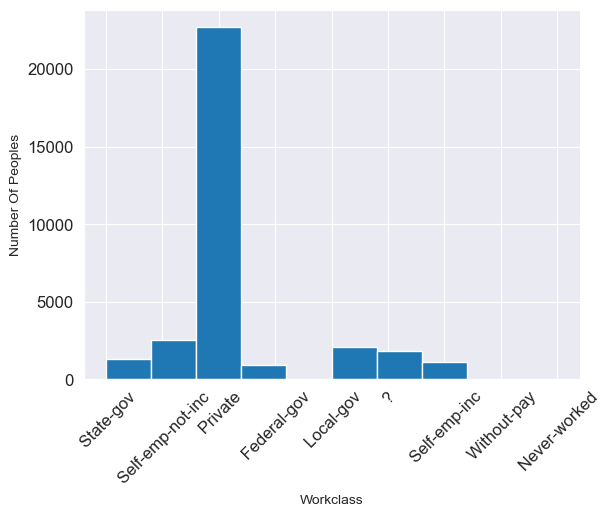

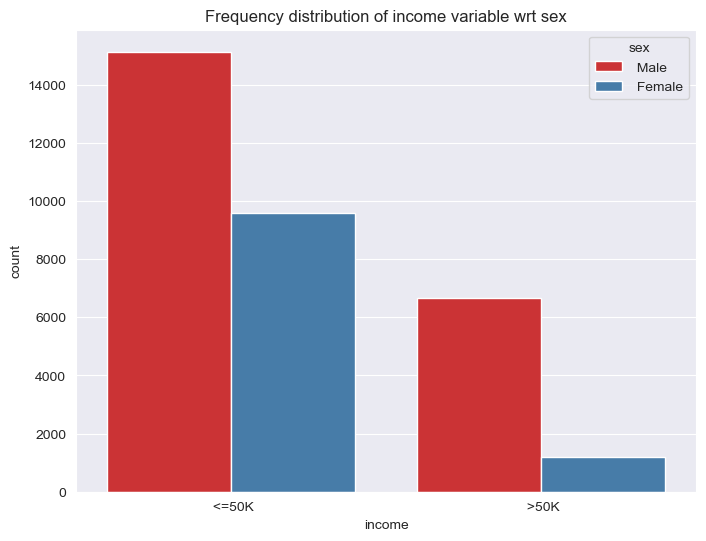

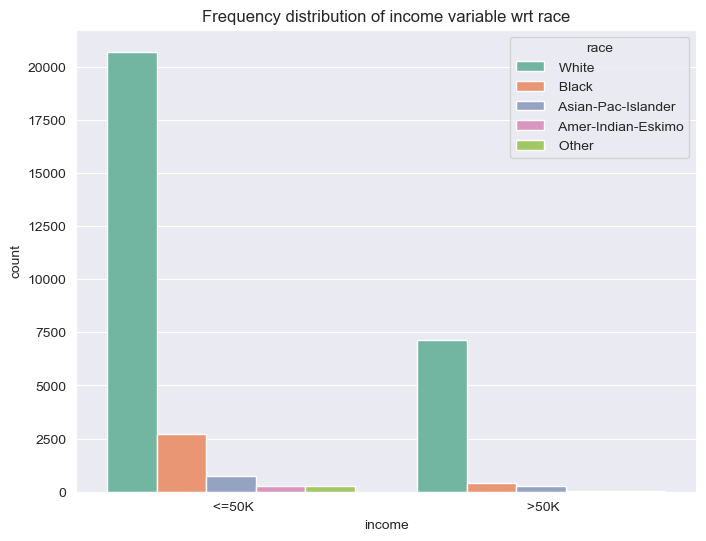

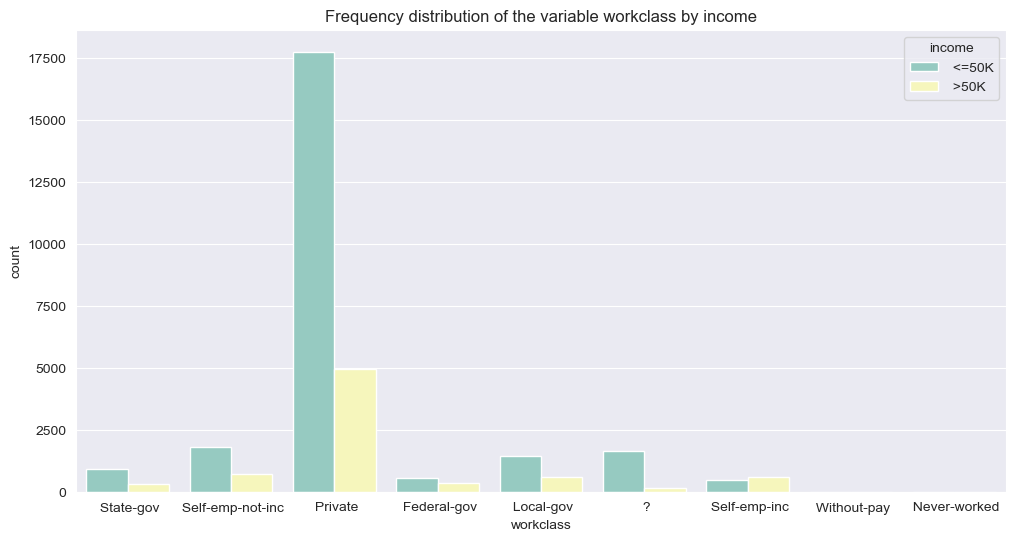

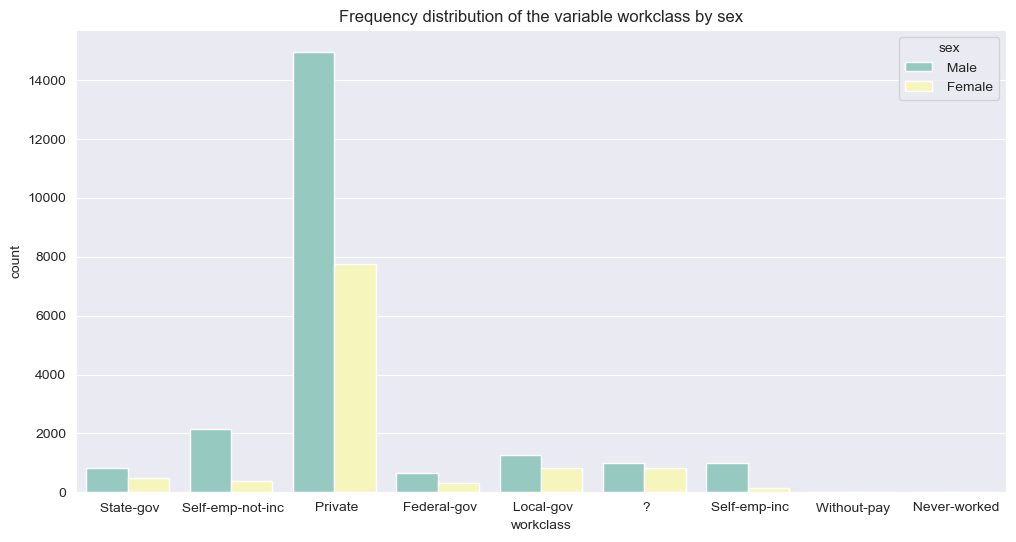

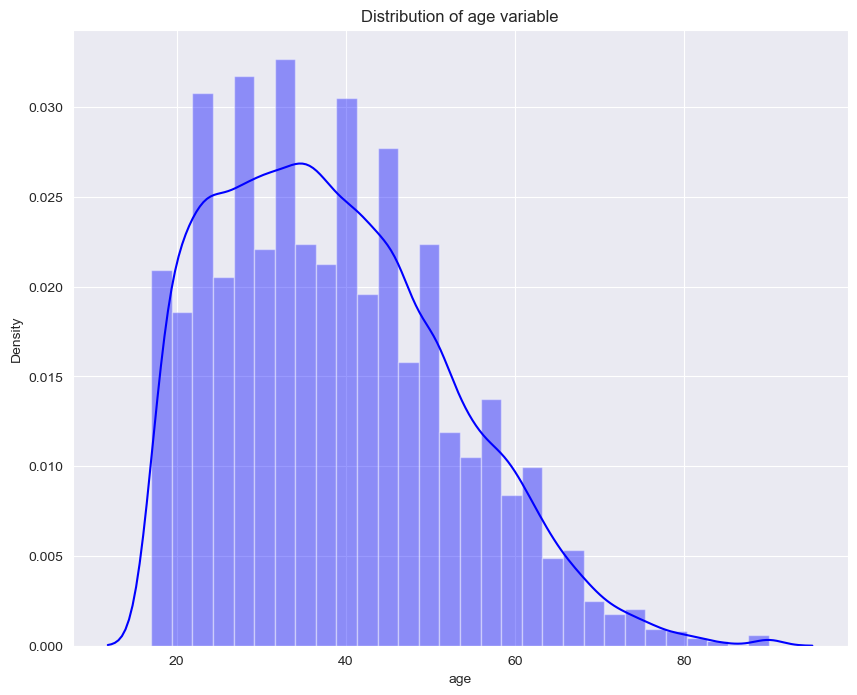

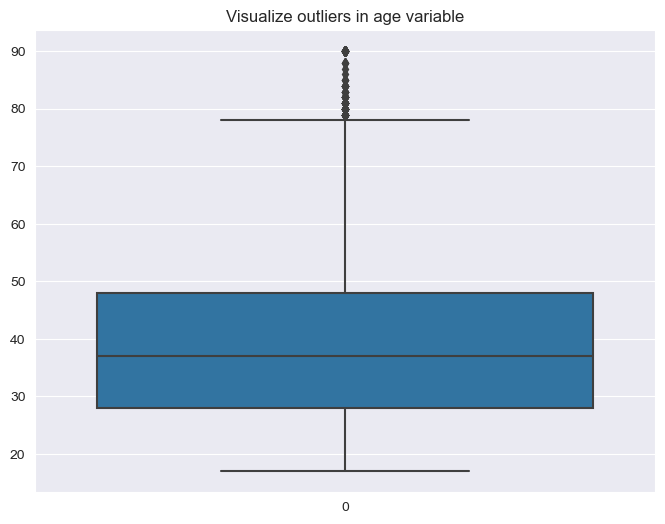

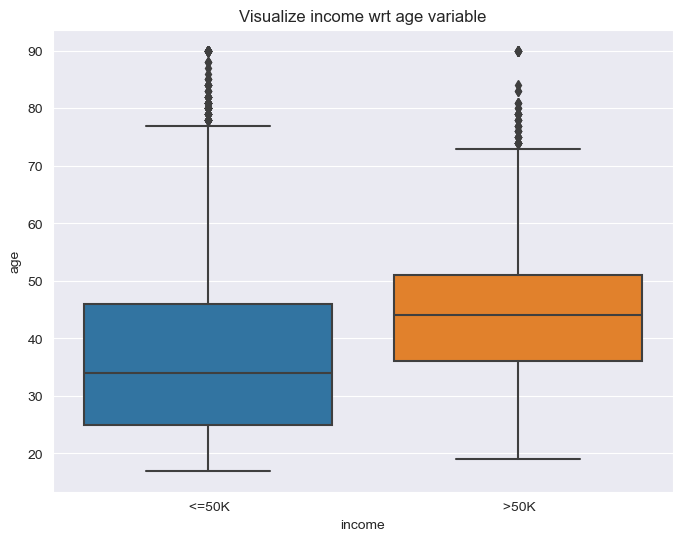

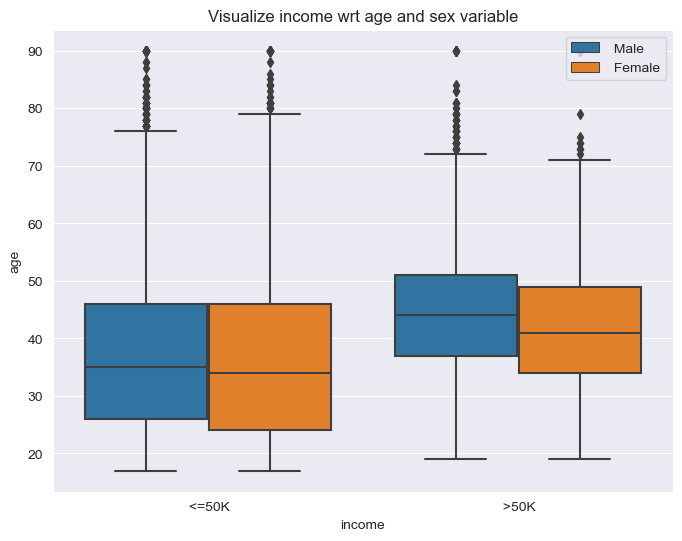

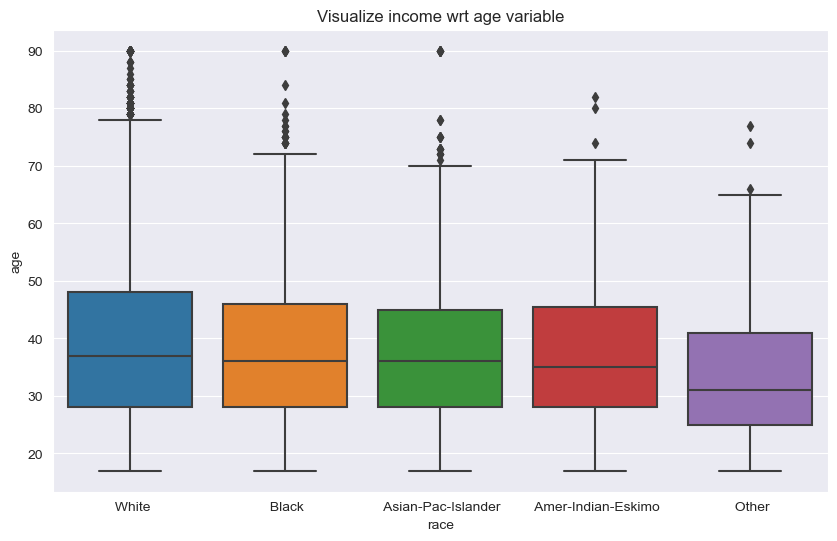

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


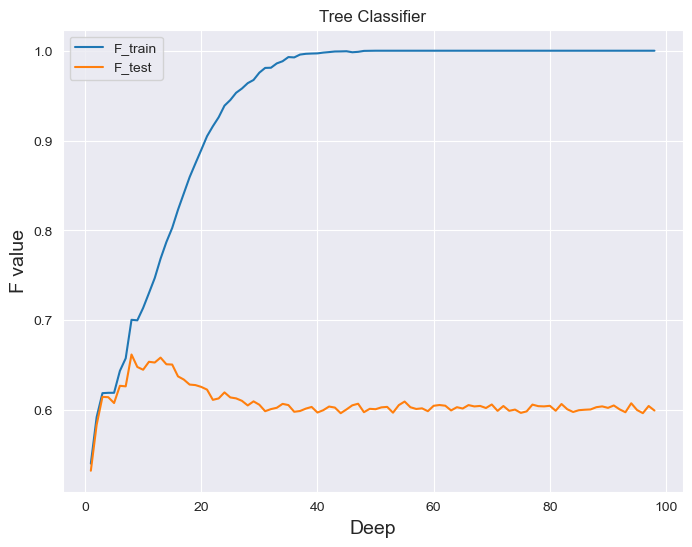

Наилучшая глубина дерева -  10 , с F-мерой  0.661945428035826
Время работы алгоритма -  18.235010862350464  секунд


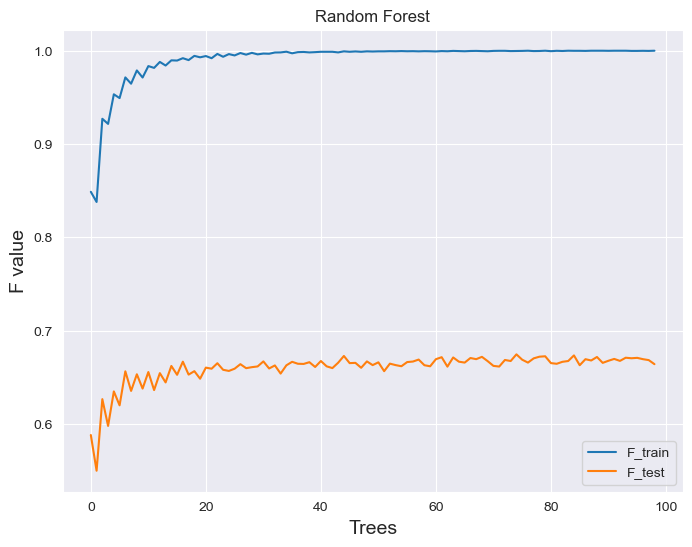

Наилучшее количество деревьев -  76 , с с F-мерой  0.6745114519857114
Время работы алгоритма -  152.5243763923645  секунд


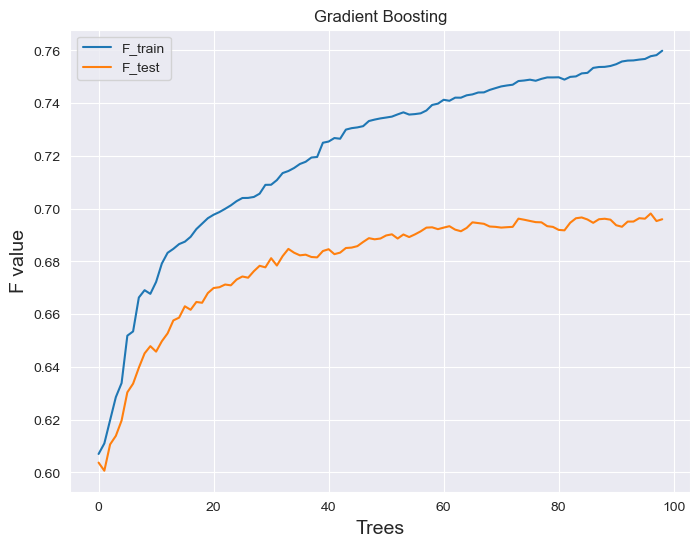

Наилучшее количество деревьев -  97 , с F-мерой  0.6981616075245831
Время работы алгоритма -  47.37942028045654  секунд
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
  

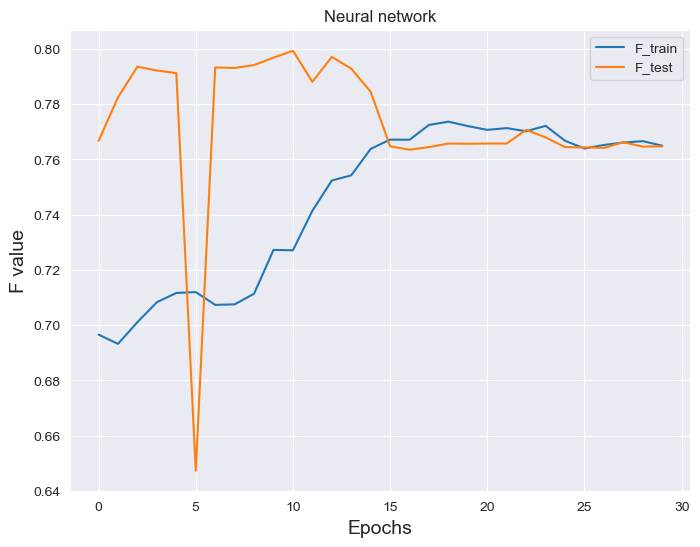

Наилучшая F-мера  0.7993671894073486
Время работы алгоритма -  81.48375964164734  секунд
336/336 [==============================] - 1s 2ms/step
Epoch 1/30
682/682 [==============================] - 3s 4ms/step - loss: 0.5480 - precision: 0.7647 - recall: 0.7647 - val_loss: 0.5448 - val_precision: 0.7643 - val_recall: 0.7643
Epoch 2/30
682/682 [==============================] - 3s 4ms/step - loss: 0.5460 - precision: 0.7635 - recall: 0.7635 - val_loss: 0.5446 - val_precision: 0.7644 - val_recall: 0.7644
Epoch 3/30
682/682 [==============================] - 3s 4ms/step - loss: 0.5485 - precision: 0.7640 - recall: 0.7640 - val_loss: 0.5441 - val_precision: 0.7647 - val_recall: 0.7647
Epoch 4/30
682/682 [==============================] - 3s 4ms/step - loss: 0.5507 - precision: 0.7653 - recall: 0.7653 - val_loss: 0.5436 - val_precision: 0.7651 - val_recall: 0.7651
Epoch 5/30
682/682 [==============================] - 3s 4ms/step - loss: 0.5628 - precision: 0.7653 - recall: 0.7653 - val_loss

KeyboardInterrupt: 

In [2]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Чтение файла датасета
df = pd.read_csv('income.csv')
df.head()

#Построим гистограмму объектов по признаку «workclass»
df['workclass'].hist(xlabelsize=12, xrot=45, ylabelsize=12)
plt.xlabel('Workclass')
plt.ylabel("Number Of Peoples")

#Визуализируем совмещенные гистограммы объектов по признаку «income» для двух значений признака «sex» на одном графике
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

#Визуализируем совмещенные гистограммы объектов по признаку «income» для всех значений признака «race» на одном графике
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

#Визуализируем совмещенные гистограммы объектов по признаку «workclass» для всех значений признака «income» на одном графике
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set3")
ax.set_title("Frequency distribution of the variable workclass by income")
plt.show()

#Визуализируем совмещенные гистограммы объектов по признаку «workclass» для двух значений признака «sex» на одном графике
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set3")
ax.set_title("Frequency distribution of the variable workclass by sex")
plt.show()

#Визуализируем гистограмму объектов по признаку «age»
f, ax = plt.subplots(figsize=(10,8))
x = df['age']
ax = sns.distplot(x, bins=30, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

#Визуализируем распределение объектов по признаку «age», используя «ящик с усами»
f, ax = plt.subplots(figsize=(8,6))
x = df['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

#Визуализируем два «ящика с усами» по признаку «age» для двух значений признака «income» на одном графике
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="income", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

#Визуализируем четыре «ящика с усами» по признаку «age» для двух значений признака «income» и двух значений признака «sex» на одном графике
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(x="income", y="age", hue="sex", data=df)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

#Визуализируем «ящики с усами» для каждого из значений признака «race» по признаку «аge»
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="race", y="age", data=df)
ax.set_title("Visualize income wrt age variable")
plt.show()

#Визуализируем тепловую карту корреляции признаков
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#Заменим значения, пропущенные в наборе данных на тип NaN
df.replace(' ?', np.NaN, inplace=True)
#Определим признаки, в которых есть пропущенные значения, посчитаем количество пропущенных значений по каждому признаку
print(df.isnull().sum()) #Напечатаем количество пропусков по каждому пункту

#Определис категориальные признаки в наборе данных
categorical = [var for var in df.columns if df[var].dtype=='O']
df[categorical].head()

#Определим числовые признаки в наборе данных
numbers = [var for var in df.columns if df[var].dtype!='O']
df[numbers].head()

#Преобразование категориальных признаков в числовые
le = LabelEncoder()
df[categorical] = df[categorical].apply(le.fit_transform)
df.head()

#Импортируем библиотеки, необходимые для проведения обучения модели решающего дерева
from sklearn import tree
from sklearn import metrics

# 3. Подготовим и разделим исходный набор данных на тренировочный и тестовый наборы, целевая переменная - признак «income»
y=df["income"]
X=df.drop(columns=(['income']))
# Разделить датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# 4. Обучение модели решающего дерева
t0 = time()
#Переменная, куда будем записывать высоту дерева и % правильных ответов на тестовой и тренировочной выборке
scores_data = pd.DataFrame()

# Задаем диапазон для поиска глубины дерева
tree_deep = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(tree_deep))
test_F = np.zeros(len(tree_deep))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор высоты дерева, меняя ее от 1 до 100
for mxd in tree_deep:
    #Создаем и обучаем дерево с жестко заданой высотой
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = mxd)
    clf.fit(X_train, y_train)
    #Определяем значение F-меры для тренировочной выборки
    y_train_predict = clf.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train, y_train_predict)) /(metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train, y_train_predict))
    train_F[(mxd - 1)] = F_train
    #Определяем значение F-меры для тестовой выборки
    y_test_predict = clf.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict))/(metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F[(mxd - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = mxd

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Tree Classifier")
ax.set_xlabel("Deep", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшая глубина дерева - ', (index_best_F + 1), ', с F-мерой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Построим матрицу ошибок для дерева оптимальной глубины
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = index_best_F)
clf.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, clf.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

# 5. Обучение модели случайного леса
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
t0 = time()
# Задаем диапазон для поиска количества деревьев
tree_number = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(tree_number))
test_F = np.zeros(len(tree_number))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор количества деревьев, меняя значения от 1 до 100
for t in tree_number:
    #Создаем и обучаем лес с жестко заданным количеством деревьев
    forest = RandomForestClassifier(n_estimators=t, bootstrap = True, max_features = 'sqrt')
    forest.fit(X_train, y_train)
    #Определяем значение F-меры для тренировочной выборки
    y_train_predict = forest.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train, y_train_predict)) /(metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train, y_train_predict))
    train_F[(t - 1)] = F_train
    #Определяем значение F-меры для тестовой выборки
    y_test_predict = forest.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict))/(metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F[(t - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = t

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Random Forest")
ax.set_xlabel("Trees", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшее количество деревьев - ', (index_best_F + 1), ', с с F-мерой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Построим матрицу ошибок для леса с оптимальным количеством деревьев
forest = RandomForestClassifier(n_estimators=index_best_F, bootstrap = True, max_features = 'sqrt')
forest.fit(X_train, y_train)
confusion_matrix = metrics.confusion_matrix(y_test, forest.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

# 6. Обучение модели градиентного бустинга
import catboost
from catboost import CatBoostClassifier
t0 = time()
# Задаем диапазон для поиска количества деревьев в композиции
boost_number = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(boost_number))
test_F = np.zeros(len(boost_number))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор количества деревьев, меняя значения от 1 до 100
for b in boost_number:
    #Создаем и обучаем лес с жестко заданным количеством деревьев
    cat = CatBoostClassifier(learning_rate=0.5, loss_function='Logloss', n_estimators = b, logging_level=None)
    cat.fit(X_train, y_train, verbose = False)
    #Определяем значение F-меры для тренировочной выборки
    y_train_predict = cat.predict(X_train)
    F_train = (2 * metrics.precision_score(y_train, y_train_predict) * metrics.recall_score(y_train, y_train_predict)) / (metrics.precision_score(y_train, y_train_predict) + metrics.recall_score(y_train, y_train_predict))
    train_F[(b - 1)] = F_train
    #Определяем значение F-меры для тестовой выборки
    y_test_predict = cat.predict(X_test)
    F_test = (2 * metrics.precision_score(y_test, y_test_predict) * metrics.recall_score(y_test, y_test_predict))/(metrics.precision_score(y_test, y_test_predict) + metrics.recall_score(y_test, y_test_predict))
    test_F[(b - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = b

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Gradient Boosting")
ax.set_xlabel("Trees", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшее количество деревьев - ', index_best_F, ', с F-мерой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Построим матрицу ошибок для леса с оптимальным количеством деревьев
cat = CatBoostClassifier(learning_rate=0.5, loss_function='Logloss', n_estimators = index_best_F, logging_level=None)
cat.fit(X_train, y_train, verbose = False)
confusion_matrix = metrics.confusion_matrix(y_test, cat.predict(X_test))
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

# 7. Обучение модели многослойного перцепторна
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

y=df["income"]
X=df.drop(columns=(['income']))
# Разделить датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# 7.1 Подготовка данных для обучения нейросети
t0 = time()
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0
# Заполним пропущенные значения в данных. Сделаем это, выбрав наиболее часто встречающиеся значения признаков в качестве замены
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)
# Далее приведем данные к типу NumPy - numpy.ndarray
X_train = X_train.to_numpy(dtype=('float32'))
X_test = X_test.to_numpy(dtype=('float32'))
#Для задачи бинарной классификации, выразим вектор бинарных ответов двумя бинарными векторами (1 и 0)
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)
# Выберем последовательную модель сборки и соберем архитектуру нейросети
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
#model.add(Dense(8))
#model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
# Скомпилируем модель
model.compile(loss='binary_crossentropy',optimizer = 'Nadam',metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train,batch_size = 32, epochs = EPOCHS,verbose = 1, validation_data = (X_test, y_test))
# После обучения считаем значение F-меры
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    f1_score_list_train.append(2 * history.history['precision'][i] *
    history.history['recall'][i] / (history.history['precision'][i] +
    history.history['recall'][i]))
    f1_score_list_test.append(2 * history.history['val_precision'][i] *
    history.history['val_recall'][i] / (history.history['val_precision'][i] +
    history.history['val_recall'][i]))
    if (f1_score_list_test[i] > best_F):
        best_F = f1_score_list_test[i]

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(f1_score_list_train, label='F_train')
ax.plot(f1_score_list_test, label='F_test')
ax.grid(True)
ax.set_title("Neural network")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшая F-мера ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Прогноз по классам для построения матрицы ошибок
y_predict = np.argmax(model.predict(X_test), axis=-1)
history = model.fit(X_train, y_train,batch_size = 32, epochs = 30,verbose = 1, validation_data = (X_test, y_test))
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_predict)
pd.DataFrame(data = confusion_matrix, columns = ['predicted >50K', 'predicted <=50K'], index = ['actual >50K', 'actual <=50K'])

# 8. Повторим пункты 6-7 для набора данных MNIST
# Загрузите данные MNIST с помощью TensorFlow
from tensorflow.keras.datasets import mnist
from sklearn.metrics import f1_score
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Визуализируем один из объектов
sample = 1
image = X_train[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
#Каждый объект представляет собой двумерный тензор 28х28 пикселей, его необходимо привести к одномерному вектору
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# 8.1 Алгоритм градиентного бустинга для модели MNIST
t0 = time()
# Задаем диапазон для поиска количества деревьев в композиции
boost_number = np.arange(1, 100, 1)
#Массивы с данными оценок
train_F = np.zeros(len(boost_number))
test_F = np.zeros(len(boost_number))
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0

#Проводим перебор количества деревьев, меняя значения от 1 до 100
for b in boost_number:
    #Создаем и обучаем лес с жестко заданным количеством деревьев
    cat = CatBoostClassifier(learning_rate=0.5, loss_function='MultiClass', n_estimators = b, logging_level=None)
    cat.fit(X_train, y_train)
    #Определяем значение F-метрики для тренировочной выборки
    y_train_predict = cat.predict(X_train)
    F_train = f1_score(y_train, cat.predict(X_train), average='micro')
    train_F[(b - 1)] = F_train
    #Определяем значение F-метрики для тестовой выборки
    y_test_predict = cat.predict(X_test)
    F_test = f1_score(y_test, cat.predict(X_test), average='micro')
    test_F[(b - 1)] = F_test
    #Определение наилучшего значения F
    if (F_test > best_F):
        best_F = F_test
        index_best_F = b

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_F, label='F_train')
ax.plot(test_F, label='F_test')
ax.grid(True)
ax.set_title("Gradient Boosting")
ax.set_xlabel("Trees", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшее количество деревьев - ', index_best_F, ', с F-метрикой ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Построим матрицу ошибок для леса с оптимальным количеством деревьев
cat = CatBoostClassifier(learning_rate=0.5, loss_function='MultiClass', n_estimators = index_best_F, logging_level=None)
cat.fit(X_train, y_train)
#Для более наглядной визуализации матрицы ошибок для многоклассового случая можно наложить на нее тепловую карту
confusion_matrix = metrics.confusion_matrix(y_test, cat.predict(X_test))
confusion_matrix = pd.DataFrame(data = confusion_matrix, columns = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9'],
                  index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")

# 8.2 Алгоритм нейронной сети для модели MNIST
t0 = time()
# Лучшая метрика F и ее индекс
best_F = 0
index_best_F = 0
# Заполним пропущенные значения в данных. Сделаем это, выбрав наиболее часто встречающиеся значения признаков в качестве замены
X['workclass'].fillna(X['workclass'].mode()[0], inplace=True)
X['occupation'].fillna(X['occupation'].mode()[0], inplace=True)
X['native_country'].fillna(X['native_country'].mode()[0], inplace=True)
# Для обучения нейронной сети преобразуем векторы ответов
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# Выберем последовательную модель сборки и соберем архитектуру нейросети
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(30))
model.add(Activation('sigmoid'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
# Скомпилируем модель
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['Precision', 'Recall'])
EPOCHS = 30
history = model.fit(X_train, y_train,batch_size = 32, epochs = EPOCHS,verbose = 1, validation_data = (X_test, y_test))
# После обучения считаем значение F-меры
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):
    if ((history.history['precision'][i] + history.history['recall'][i]) > 0):
        f1_score_list_train.append(2 * history.history['precision'][i] *
    history.history['recall'][i] / (history.history['precision'][i] +
    history.history['recall'][i]))
    else:
        f1_score_list_train.append(0)
    if ((history.history['val_precision'][i] + history.history['val_recall'][i]) > 0): #Вдруг precision и recall равны 0
        f1_score_list_test.append(2 * history.history['val_precision'][i] *
    history.history['val_recall'][i] / (history.history['val_precision'][i] +
    history.history['val_recall'][i]))
    else:
        f1_score_list_test.append(0)
    if (f1_score_list_test[i] > best_F):
        best_F = f1_score_list_test[i]

# Визуализация полученных данных
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(f1_score_list_train, label='F_train')
ax.plot(f1_score_list_test, label='F_test')
ax.grid(True)
ax.set_title("Neural network")
ax.set_xlabel("Epochs", fontsize=14)
ax.set_ylabel("F value", fontsize=14)
ax.legend()
plt.show()

t1 = time()
alg_time = t1-t0
print('Наилучшая F-мера ', best_F)
print('Время работы алгоритма - ', alg_time, ' секунд')

# Построим матрицу ошибок для нейронной сети
import seaborn as sns
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
#Для более наглядной визуализации матрицы ошибок для многоклассового случая можно наложить на нее тепловую карту
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix = pd.DataFrame(data = confusion_matrix, columns = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9'],
                  index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(confusion_matrix, annot=True, fmt="d")
